<center>Name : Fatima Zahra<br>
Email : FatimaZahraAIML@hotmail.com<br>
Github : SyedaFatima55<br>
Title : Project Practices</center>

Step 1: Install Libraries

In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


Step 2 : Import Libraries

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

Step 3: Load the Dataset

In [14]:
df=pd.read_csv('COVID19_sample.csv')

Step 4: Check Missing Values

In [15]:
print("Null Values Per Column:")
print(df.isnull().sum())

Null Values Per Column:
Date             0
Country          0
New Cases       15
Total Cases      0
New Deaths      10
Total Deaths     0
dtype: int64


Step 5: Check Data Types

In [22]:
print(df.dtypes)

Date             object
Country          object
New Cases        object
Total Cases     float64
New Deaths      float64
Total Deaths    float64
dtype: object


Step 6: convert 'New Cases' column to numeric

In [29]:
df['New Cases'] = pd.to_numeric(df['New Cases'])

Step 7:convert 'New Deaths' column to numeric

In [28]:
df['New Deaths'] = pd.to_numeric(df['New Deaths'])

Step 8 : Again View Data

In [30]:
print(df.dtypes)

Date             object
Country          object
New Cases       float64
Total Cases     float64
New Deaths      float64
Total Deaths    float64
dtype: object


Step 9: Basic info

In [10]:
print("Dataset Preview")
print(df.head())

Dataset Preview
        Date   Country  New Cases  Total Cases  New Deaths  Total Deaths
0 2020-03-01  Pakistan        442          442           3             3
1 2020-03-02  Pakistan        454          896          14            17
2 2020-03-03  Pakistan        357         1253           0            17
3 2020-03-04  Pakistan        611         1864          20            37
4 2020-03-05  Pakistan        512         2376          14            51


Step 10: Replace Null Values of 'New Cases' with Mean

In [ ]:
Cases_mean=df['New Cases'].mean()
df['New Cases'] = df['New Cases'].fillna(Cases_mean)

Step 11: Replace Null Values of 'New Deaths' with Median

In [39]:
Cases_med=df['New Deaths'].mean()
df['New Deaths'] = df['New Deaths'].fillna(Cases_med)

Step 12:Save the cleaned data

In [40]:
df.to_csv("Cleaned_COVID19.csv", index=False)


Step 13: Load Clean Data to a Data Frame

In [41]:
df=pd.read_csv('Cleaned_COVID19.csv')

Step 14: Daily New COVID-19 Cases in Pakistan

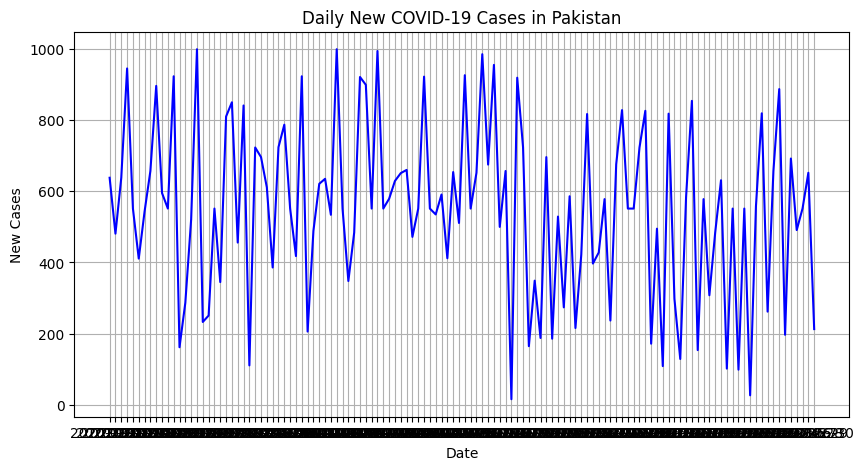

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['New Cases'], color='blue')
plt.title('Daily New COVID-19 Cases in Pakistan')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()

Step 15: Daily New COVID-19 Deaths in Pakistan

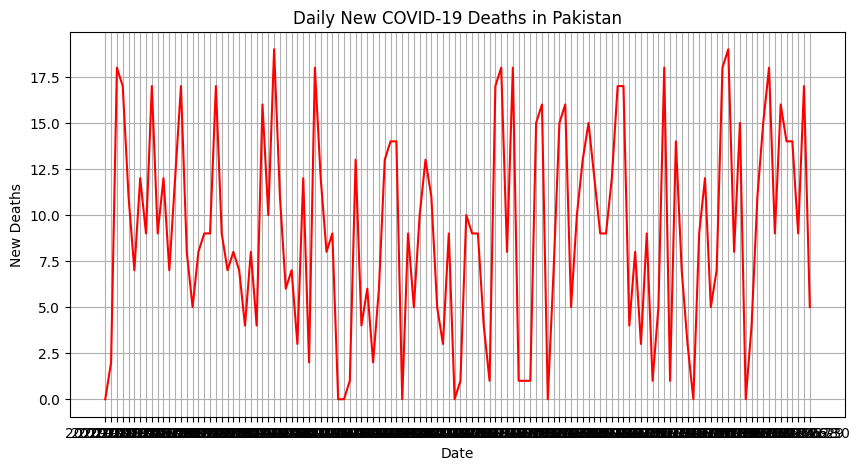

In [43]:
x=df['Date']
y=df['New Deaths']
plt.figure(figsize=(10, 5))
plt.plot(x , y , color='red')
plt.title('Daily New COVID-19 Deaths in Pakistan')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.grid(True)
plt.show()

Step 16: Total Cases vs Total Deaths Over Time

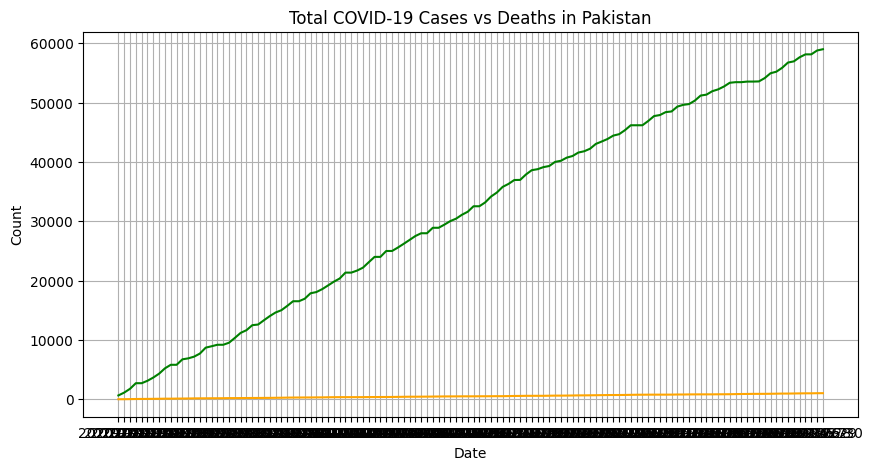

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Total Cases'], label='Total Cases', color='green')
plt.plot(df['Date'], df['Total Deaths'], label='Total Deaths', color='orange')
plt.title('Total COVID-19 Cases vs Deaths in Pakistan')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Step 17: Top 10 Highest New Case Days

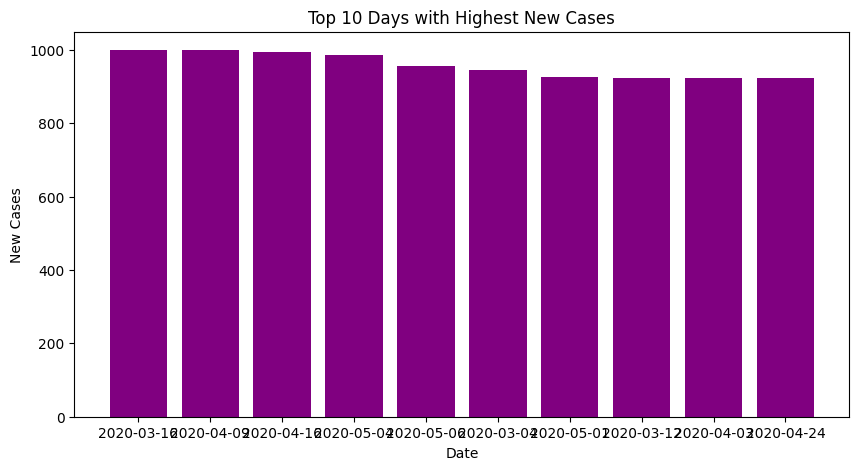

In [45]:
top_10 = df.sort_values(by='New Cases', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_10['Date'], top_10['New Cases'], color='purple')
plt.title('Top 10 Days with Highest New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

Step 18: Cumulative New Cases vs New Deaths

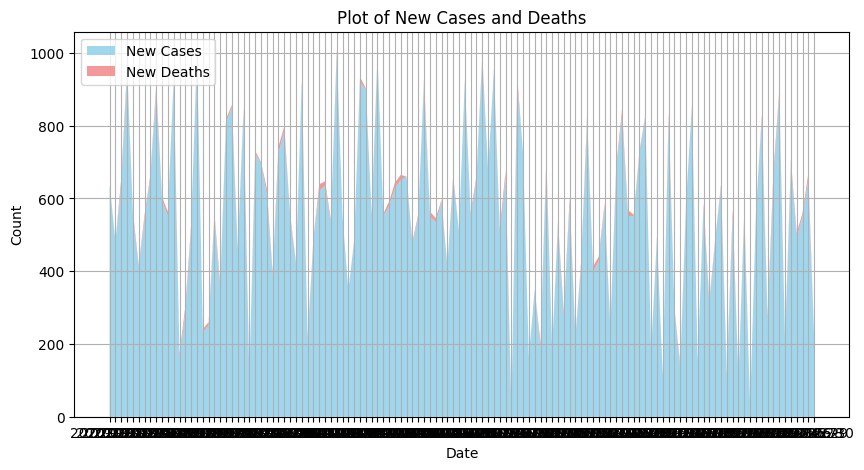

In [46]:
plt.figure(figsize=(10, 5))
plt.stackplot(df['Date'], df['New Cases'], df['New Deaths'],labels=['New Cases', 'New Deaths'],colors=['skyblue', 'lightcoral'], alpha=0.8)
plt.title('Plot of New Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Step 19: Pie Chart: Outcome Proportions

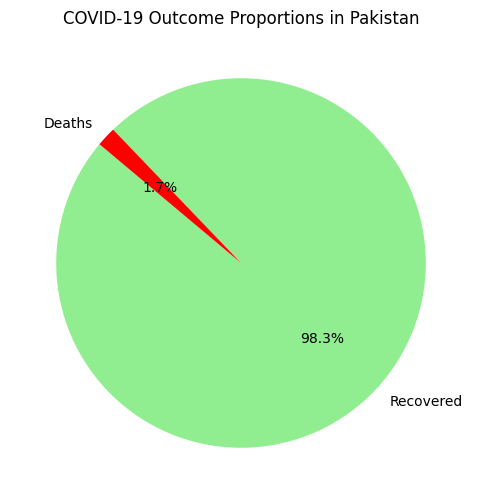

In [47]:
total_cases = df['Total Cases'].iloc[-1]
total_deaths = df['Total Deaths'].iloc[-1]
recovered = total_cases - total_deaths

plt.figure(figsize=(6, 6))
plt.pie([recovered, total_deaths], labels=['Recovered', 'Deaths'],
        colors=['lightgreen', 'red'], autopct='%1.1f%%', startangle=140)
plt.title('COVID-19 Outcome Proportions in Pakistan')
plt.show()

Step 20: 7-Day Rolling Average of New Cases

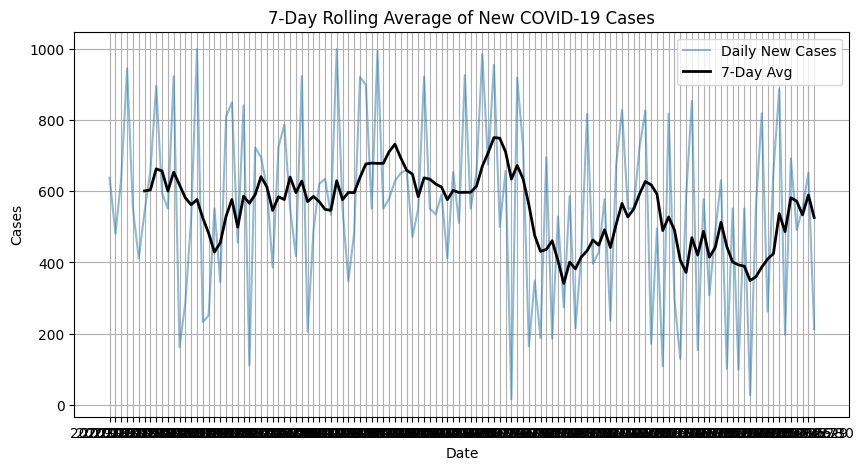

In [48]:
df['7-Day Avg'] = df['New Cases'].rolling(window=7).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['New Cases'], label='Daily New Cases', alpha=0.5)
plt.plot(df['Date'], df['7-Day Avg'], label='7-Day Avg', color='black', linewidth=2)
plt.title('7-Day Rolling Average of New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()

Step 21: Histogram: Distribution of New Cases

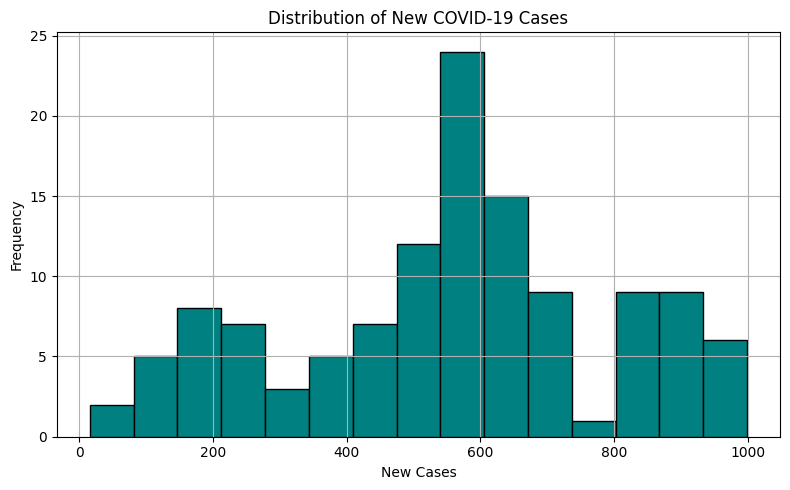

In [49]:
plt.figure(figsize=(8, 5))
plt.hist(df['New Cases'], bins=15, color='teal', edgecolor='black')
plt.title('Distribution of New COVID-19 Cases')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()